### Ransomware/Malware Prediction

### Importing Libraries and Dataset

In [18]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv("Ransomware.csv",sep='|')

In [19]:
from sklearn.metrics import f1_score
import sklearn.metrics

### Dataset Exploration

In [20]:
df

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [21]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [22]:
# Checking the size of dataframe
from sys import getsizeof
initial_size = getsizeof(df)/(1024.0**3)
print("Size of DataFrame: {} GB".format(initial_size))

Size of DataFrame: 0.0777690215036273 GB


### Null value check

In [23]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

### Distribution of Labelled Data

In [24]:
df.legitimate.value_counts() #1 means legitimate, 0 means malware

legitimate
0    96724
1    41323
Name: count, dtype: int64

In [25]:
# Converting labelled data in categories datatype
df.legitimate = df.legitimate.astype('category')
df.legitimate

0         1
1         1
2         1
3         1
4         1
         ..
138042    0
138043    0
138044    0
138045    0
138046    0
Name: legitimate, Length: 138047, dtype: category
Categories (2, int64): [0, 1]

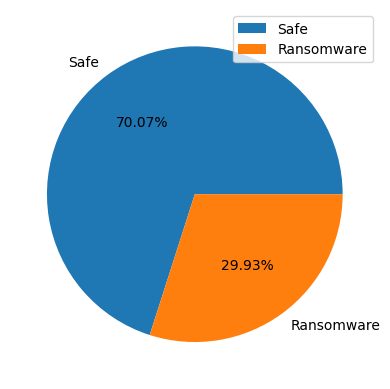

In [26]:
plt.pie(df.legitimate.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.show()

### Unique names 

In [27]:
df.md5.nunique()

138047

In [28]:
df.md5.shape[0]

138047

In [29]:
# There are no same files as no 2 files can have same md5 without the same content

### Column Analysis

In [30]:
df.shape[1]

57

In [31]:
df.columns

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'SectionsNb',
       'SectionsMeanEntropy', 'SectionsMinEntropy', 'SectionsMaxEntropy',
       'SectionsMeanRawsize', 'SectionsMinRawsize', 'SectionMaxRawsize',
       'SectionsMeanVirtualsize', 'SectionsMinVirtualsize',
       'SectionMaxVirtualsize', 'ImportsNbDLL', 'ImportsNb',
       'Impor

In [32]:
df.dtypes

Name                             object
md5                              object
Machine                           int64
SizeOfOptionalHeader              int64
Characteristics                   int64
MajorLinkerVersion                int64
MinorLinkerVersion                int64
SizeOfCode                        int64
SizeOfInitializedData             int64
SizeOfUninitializedData           int64
AddressOfEntryPoint               int64
BaseOfCode                        int64
BaseOfData                        int64
ImageBase                       float64
SectionAlignment                  int64
FileAlignment                     int64
MajorOperatingSystemVersion       int64
MinorOperatingSystemVersion       int64
MajorImageVersion                 int64
MinorImageVersion                 int64
MajorSubsystemVersion             int64
MinorSubsystemVersion             int64
SizeOfImage                       int64
SizeOfHeaders                     int64
CheckSum                          int64


### EDA

Non-numerical columns: Index(['Name', 'md5'], dtype='object')


<Axes: >

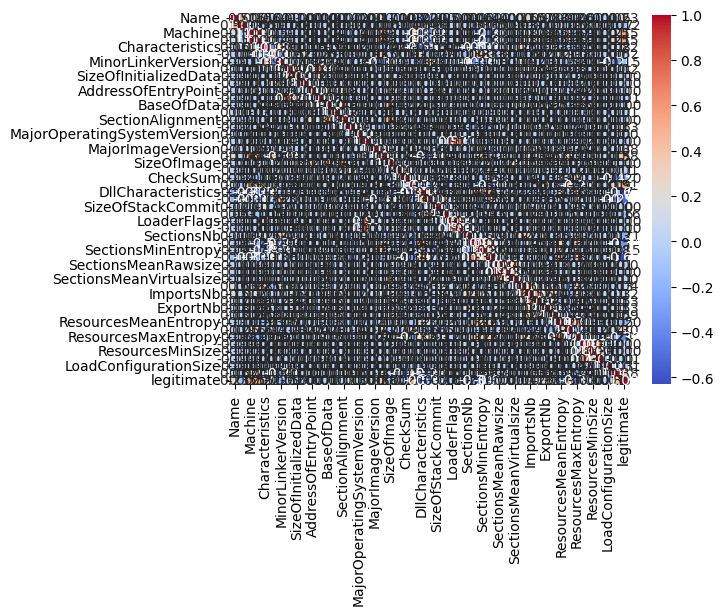

In [74]:
non_numerical_columns = df.select_dtypes(include=['object']).columns
print("Non-numerical columns:", non_numerical_columns)

df_numerical = df.drop(columns=non_numerical_columns)

from sklearn.preprocessing import LabelEncoder

# Encode non-numerical columns
for column in non_numerical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [75]:
# Using VIF to remove highly correlated columns 
from statsmodels.stats.outliers_influence import variance_inflation_factor


cols_vif = df.columns.tolist()
cols_vif.remove('legitimate')
cols_vif.remove('md5')
cols_vif.remove('Name')
cols_vif


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = cols_vif

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[cols_vif].values, i)
                          for i in range(len(cols_vif))]

print(vif_data)

                        feature   VIF
0                       Machine  1.18
1          SizeOfOptionalHeader  0.02
2               Characteristics  1.40
3            MajorLinkerVersion  1.15
4            MinorLinkerVersion  1.51
5                    SizeOfCode  5.17
6         SizeOfInitializedData  1.56
7       SizeOfUninitializedData  1.00
8           AddressOfEntryPoint  1.07
9                    BaseOfCode  4.27
10                   BaseOfData  1.51
11                    ImageBase  1.00
12             SectionAlignment  1.58
13                FileAlignment  1.07
14  MajorOperatingSystemVersion  1.00
15  MinorOperatingSystemVersion  4.05
16            MajorImageVersion  1.01
17        MajorSubsystemVersion  0.50
18                  SizeOfImage  1.97
19                SizeOfHeaders  1.05
20                     CheckSum  1.04
21                    Subsystem  0.63
22           DllCharacteristics  1.60
23           SizeOfStackReserve  1.30
24            SizeOfStackCommit  1.02
25          

In [81]:
# df.drop(['MinorImageVersion','MinorSubsystemVersion','SizeOfHeapCommit','SectionsMinRawsize','SectionsMinVirtualsize','SectionMaxVirtualsize' ],axis=1, inplace=True)

<Axes: >

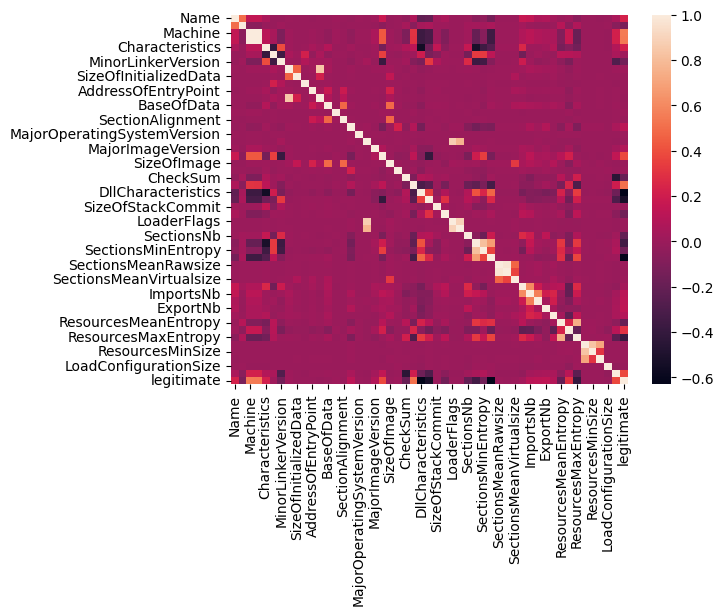

In [82]:
sns.heatmap(df.corr())

### Feature Extraction

In [83]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [84]:
df.legitimate = df.legitimate.astype('int64')

In [85]:
iv, woe = iv_woe(df.drop(['Name'],axis=1), 'legitimate')

Information value of md5 is 0.135076
Information value of Machine is 2.596527
Information value of SizeOfOptionalHeader is 2.596853
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MajorSubsystemVersion is 3.566766
Information value of SizeOfImage is 2.965568
Informat

In [86]:
iv.sort_values(by = 'IV', ascending=False)

,Variable,IV
0,ImageBase,6.10
0,VersionInformationSize,5.19
0,SectionsMaxEntropy,4.98
0,MajorOperatingSystemVersion,4.34
0,ResourcesMinSize,4.27
0,SizeOfStackReserve,4.16
0,Characteristics,3.82
0,SizeOfInitializedData,3.57
0,MajorSubsystemVersion,3.57
0,ResourcesNb,3.09


In [87]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'].values.tolist()

In [88]:
features

['ImageBase',
 'VersionInformationSize',
 'SectionsMaxEntropy',
 'MajorOperatingSystemVersion',
 'ResourcesMinSize',
 'SizeOfStackReserve',
 'Characteristics',
 'SizeOfInitializedData',
 'MajorSubsystemVersion',
 'ResourcesNb',
 'Subsystem',
 'ResourcesMinEntropy',
 'BaseOfData',
 'SizeOfImage',
 'MajorLinkerVersion',
 'ExportNb',
 'SizeOfOptionalHeader',
 'Machine',
 'SectionsMeanRawsize',
 'SizeOfCode',
 'DllCharacteristics',
 'ResourcesMaxSize',
 'AddressOfEntryPoint',
 'SectionsMeanVirtualsize',
 'ImportsNb',
 'ResourcesMaxEntropy',
 'ResourcesMeanSize',
 'CheckSum',
 'SectionsMeanEntropy',
 'SectionsMinEntropy',
 'ImportsNbDLL',
 'SectionMaxRawsize',
 'ResourcesMeanEntropy',
 'SectionsNb',
 'MinorLinkerVersion',
 'MinorOperatingSystemVersion',
 'ImportsNbOrdinal',
 'SizeOfUninitializedData',
 'LoadConfigurationSize',
 'MajorImageVersion',
 'SectionAlignment',
 'FileAlignment',
 'md5',
 'SizeOfHeaders',
 'BaseOfCode',
 'SizeOfHeapReserve',
 'SizeOfStackCommit',
 'NumberOfRvaAndSize

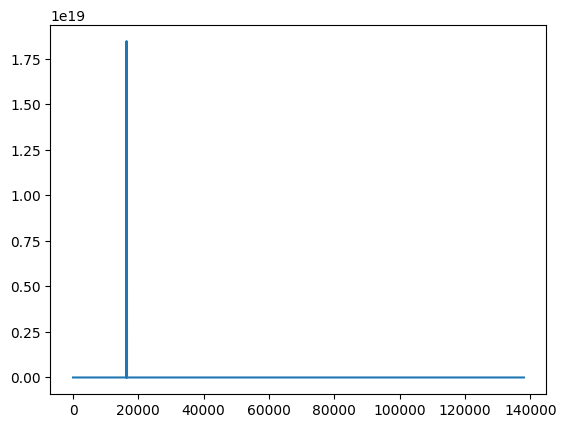

In [89]:
plt.plot(df.ImageBase)

### Data Imbalance - SMOTE TOMEK 

In [90]:
X=df[features]
y=df['legitimate']

In [91]:
randomseed = 42

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

138047
Training labels shape: (92491,)
Test labels shape: (45556,)
Training features shape: (92491, 49)
Test features shape: (45556, 49)


In [94]:
from collections import Counter
import imblearn

In [95]:
"""
Before SMOTE_Tomek
"""
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)



# creating imblearn resampling object
# sampling strategy is the propotion of output
# resampled data that is the minority class
over_and_under_sample =  imblearn.combine.SMOTETomek(sampling_strategy = 1.0, n_jobs = -1, random_state = randomseed)
X_train, y_train = over_and_under_sample.fit_resample(X_train, y_train)
print(X_train)

# checking under- and over-sample ratios between train and test set.
# DO NOT resample the test set!
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Counter({0: 64881, 1: 27610}) Counter({0: 31843, 1: 13713})
              ImageBase  VersionInformationSize  SectionsMaxEntropy  \
0            4194304.00                       0                6.91   
1            4194304.00                      15                7.96   
2      8792615682048.00                      16                6.21   
3            4194304.00                      14                7.96   
4            4194304.00                      15                7.96   
...                 ...                     ...                 ...   
129575 8792912756736.00                      16                6.41   
129576      16777216.00                      20                6.16   
129577    1091371008.00                      16                6.80   
129578     268435456.00                      16                5.82   
129579      16777216.00                      16                6.67   

        MajorOperatingSystemVersion  ResourcesMinSize  SizeOfStackReserve  \
0         

In [96]:
# There is significant change in samples of Malware Data

In [97]:
print(X_test.shape[0] + X_train.shape[0])
print('Training labels shape:', y_train.shape)
print('Test labels shape:', y_test.shape)
print('Training features shape:', X_train.shape)
print('Test features shape:', X_test.shape)

175136
Training labels shape: (129580,)
Test labels shape: (45556,)
Training features shape: (129580, 49)
Test features shape: (45556, 49)


### Lazy Predict - AutoML

In [98]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
print(df.columns)

Index(['Name', 'md5', 'Machine', 'SizeOfOptionalHeader', 'Characteristics',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion',
       'MajorSubsystemVersion', 'SizeOfImage', 'SizeOfHeaders', 'CheckSum',
       'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SizeOfStackCommit', 'SizeOfHeapReserve', 'LoaderFlags',
       'NumberOfRvaAndSizes', 'SectionsNb', 'SectionsMeanEntropy',
       'SectionsMinEntropy', 'SectionsMaxEntropy', 'SectionsMeanRawsize',
       'SectionMaxRawsize', 'SectionsMeanVirtualsize', 'ImportsNbDLL',
       'ImportsNb', 'ImportsNbOrdinal', 'ExportNb', 'ResourcesNb',
       'ResourcesMeanEntropy', 'ResourcesMinEntropy', 'ResourcesMaxEntropy',
       'ResourcesMeanSize', 'Resour

In [99]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

              ImageBase  VersionInformationSize  SectionsMaxEntropy  \
0            4194304.00                       0                6.91   
1            4194304.00                      15                7.96   
2      8792615682048.00                      16                6.21   
3            4194304.00                      14                7.96   
4            4194304.00                      15                7.96   
...                 ...                     ...                 ...   
129575 8792912756736.00                      16                6.41   
129576      16777216.00                      20                6.16   
129577    1091371008.00                      16                6.80   
129578     268435456.00                      16                5.82   
129579      16777216.00                      16                6.67   

        MajorOperatingSystemVersion  ResourcesMinSize  SizeOfStackReserve  \
0                                 4                16             1048

 97%|█████████▋| 30/31 [2:06:13<01:07, 67.00s/it]    

[LightGBM] [Info] Number of positive: 64790, number of negative: 64790
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9240
[LightGBM] [Info] Number of data points in the train set: 129580, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 31/31 [2:06:16<00:00, 244.41s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.99               0.99     0.99      0.99   
LGBMClassifier                     0.99               0.99     0.99      0.99   
XGBClassifier                      0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
BaggingClassifier                  0.99               0.99     0.99      0.99   
DecisionTreeClassifier             0.99               0.99     0.99      0.99   
KNeighborsClassifier               0.99               0.99     0.99      0.99   
SVC                                0.99               0.99     0.99      0.99   
AdaBoostClassifier                 0.99               0.99     0.99      0.99   
ExtraTreeClassifier                0.99               0.99     0.99      0.99   
SGDClassifier               

In [100]:
# RandomForestClassifier is best fitting in Auto-ML
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = randomseed)

In [101]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [102]:
pred = rf.predict(X_test)
print(rf.feature_names_in_)

model_filename = 'ransomware_detection_model.pkl'
joblib.dump(rf, model_filename)

['ImageBase' 'VersionInformationSize' 'SectionsMaxEntropy'
 'MajorOperatingSystemVersion' 'ResourcesMinSize' 'SizeOfStackReserve'
 'Characteristics' 'SizeOfInitializedData' 'MajorSubsystemVersion'
 'ResourcesNb' 'Subsystem' 'ResourcesMinEntropy' 'BaseOfData'
 'SizeOfImage' 'MajorLinkerVersion' 'ExportNb' 'SizeOfOptionalHeader'
 'Machine' 'SectionsMeanRawsize' 'SizeOfCode' 'DllCharacteristics'
 'ResourcesMaxSize' 'AddressOfEntryPoint' 'SectionsMeanVirtualsize'
 'ImportsNb' 'ResourcesMaxEntropy' 'ResourcesMeanSize' 'CheckSum'
 'SectionsMeanEntropy' 'SectionsMinEntropy' 'ImportsNbDLL'
 'SectionMaxRawsize' 'ResourcesMeanEntropy' 'SectionsNb'
 'MinorLinkerVersion' 'MinorOperatingSystemVersion' 'ImportsNbOrdinal'
 'SizeOfUninitializedData' 'LoadConfigurationSize' 'MajorImageVersion'
 'SectionAlignment' 'FileAlignment' 'md5' 'SizeOfHeaders' 'BaseOfCode'
 'SizeOfHeapReserve' 'SizeOfStackCommit' 'NumberOfRvaAndSizes'
 'LoaderFlags']


['ransomware_detection_model.pkl']

### Confusion Matrix

In [103]:
cm=confusion_matrix(y_test,pred)
cm

array([[31673,   170],
       [   64, 13649]])

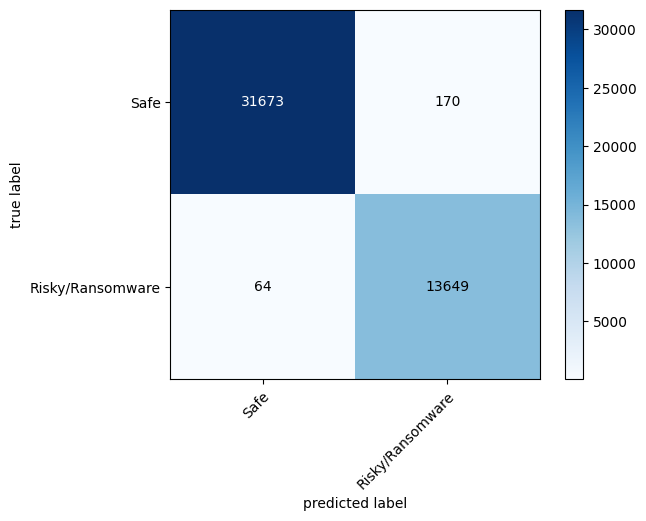

In [104]:
# Classes
classes = ['Safe', 'Risky/Ransomware']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   colorbar = True)

plt.show()

In [105]:
from sklearn.metrics import matthews_corrcoef as mcc
mcc(y_test,pred)

# All the quadrants of CM are having high performance and correlation between correct values

np.float64(0.9878355094414883)

### AUC-ROC

In [106]:
from sklearn.metrics import roc_auc_score 

auc = np.round(roc_auc_score(y_test, pred), 3) 
  
print("Auc for our sample data is {}". format(auc))

Auc for our sample data is 0.995


In [107]:
y_pred = rf.predict_proba(X_test)[:,1]
y_pred

array([0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.  ])

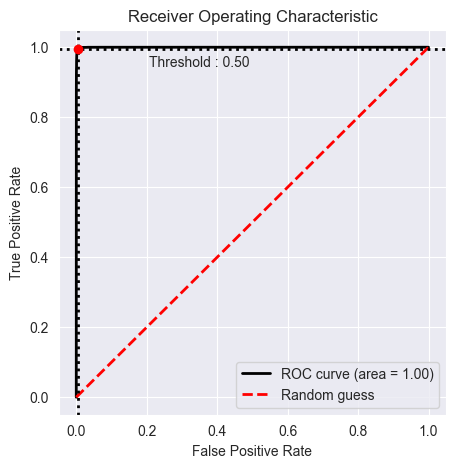

In [108]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Safe", "Ransomware"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

### Feature Importance 

In [109]:
col_sorted_by_importance=rf.feature_importances_.argsort()
feat_imp=pd.DataFrame({
    'cols':X.columns[col_sorted_by_importance],
    'imps':rf.feature_importances_[col_sorted_by_importance]
})

In [110]:
import plotly_express as px
import plotly.offline as po
px.bar(feat_imp.sort_values(['imps'], ascending=False)[:25], x='cols', y='imps', labels={'cols':'column', 'imps':'feature importance'})

### Lime Explainability

In [111]:
# Importing the module for LimeTabularExplainer
import lime.lime_tabular

# Instantiating the explainer object by passing in the training set, and the extracted features
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train.values,feature_names=X_train.columns, verbose=True, mode='classification')

In [112]:
# Index corresponding to the test vector
i = 10

exp_lime = explainer_lime.explain_instance(X_test.values[i], rf.predict_proba, num_features=5)

# Finally visualizing the explanations
exp_lime.show_in_notebook(show_table=True)

Intercept 0.7665988087077406
Prediction_local [0.43163694]
Right: 0.0


In [113]:
X_test.iloc[i]

ImageBase                     4194304.00
VersionInformationSize             15.00
SectionsMaxEntropy                  7.96
MajorOperatingSystemVersion         5.00
ResourcesMinSize                   48.00
SizeOfStackReserve            1048576.00
Characteristics                   258.00
SizeOfInitializedData          385024.00
MajorSubsystemVersion               5.00
ResourcesNb                         6.00
Subsystem                           2.00
ResourcesMinEntropy                 2.46
BaseOfData                     126976.00
SizeOfImage                    528384.00
MajorLinkerVersion                 10.00
ExportNb                            0.00
SizeOfOptionalHeader              224.00
Machine                           332.00
SectionsMeanRawsize            100966.40
SizeOfCode                     119808.00
DllCharacteristics              33088.00
ResourcesMaxSize                 9640.00
AddressOfEntryPoint             61532.00
SectionsMeanVirtualsize        102635.80
ImportsNb       

### To save the requirements as txt

- Start by opening a terminal and installing pipreqs and nbconvert.
    - pip install pipreqs
    - pip install nbconvert
- Then, navigate to the folder where your Jupyter notebook is located.
- If we assume the notebook is called “Ransomware”. You’ll need to escape the space with a backslash (\).
    - jupyter nbconvert --output-dir="./reqs" --to script Ransomware.ipynb
    - cd reqs
    - pipreqs